# Aim
To predict delivery time in minute for a food delivery App using regression models on the [Food Delivery Dataset]. 

In [1]:
#import Libraries
import numpy as np 
import pandas as pd 
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Trainng DAta

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


# Test data

In [3]:
df_test = pd.read_csv("test.csv")
df_test

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian
11395,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian
11397,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian


In [4]:
df_train=df_train.replace('NaN', float(np.nan), regex=True)
df_train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [5]:
df_test=df_test.replace('NaN', float(np.nan), regex=True)
df_test.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions              158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
dtype: int64

# join train and test to clean the data

In [6]:
df = pd.concat([df_test.assign(indic="test"), df_train.assign(indic="train")])

# Data cleaning


In [7]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,indic,Time_taken(min)
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,test,NaN
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,test,NaN
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,test,NaN
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,test,NaN
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,test,NaN


# Removing the string part from Weatherconditions and min

In [8]:
df['Weatherconditions']=df['Weatherconditions'].str.split(" ", expand=True)[1]
df['Time_taken(min)']=df['Time_taken(min)'].str.split(" ", expand=True)[1]

In [9]:
#changing  to float
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition',
        'Time_taken(min)']
for col in num_cols:
    df[col]=df[col].astype('float64')

In [10]:
#changing order_date to datetime
df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56992 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           56992 non-null  object        
 1   Delivery_person_ID           56992 non-null  object        
 2   Delivery_person_Age          54647 non-null  float64       
 3   Delivery_person_Ratings      54577 non-null  float64       
 4   Restaurant_latitude          56992 non-null  float64       
 5   Restaurant_longitude         56992 non-null  float64       
 6   Delivery_location_latitude   56992 non-null  float64       
 7   Delivery_location_longitude  56992 non-null  float64       
 8   Order_Date                   56992 non-null  datetime64[ns]
 9   Time_Orderd                  54817 non-null  object        
 10  Time_Order_picked            56992 non-null  object        
 11  Weatherconditions            56218 non-nu

## Finding the distance in Kilometers using geodesic. 


In [11]:
cols=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
for col in cols:
    df[col]= abs(df[col])

In [12]:
from geopy.distance import geodesic 
import gc

df['distance']=np.zeros(len(df))
restaurant_cordinates_df=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates_df=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

for i in range(len(df)):
    df['distance'].loc[i]=geodesic(restaurant_cordinates_df[i],delivery_location_cordinates_df[i])


In [13]:
#converting geodisc to float
df['distance']=df['distance'].astype("str").str.extract('(\d+)')
df['distance']=df['distance'].astype("float64")

In [14]:
df['distance'].describe()

count    56992.000000
mean         9.244403
std          5.563173
min          1.000000
25%          4.000000
50%          9.000000
75%         13.000000
max         20.000000
Name: distance, dtype: float64

## Finding the Order preparation time in minutes

In [15]:
df['Time_Orderd']=pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked']=pd.to_timedelta(df['Time_Order_picked'])

df['Time_Order_picked_formatted']=np.where(df['Time_Order_picked'] < df['Time_Orderd'], df['Order_Date'] + pd.DateOffset(1)+df['Time_Order_picked'], df['Order_Date']+df['Time_Order_picked'])
df['Time_Ordered_formatted'] = df['Order_Date']+ df['Time_Orderd']
df['order_preparation_time']=((df['Time_Order_picked_formatted']- df['Time_Ordered_formatted']).dt.total_seconds())/60

In [16]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_vehicle,multiple_deliveries,Festival,City,indic,Time_taken(min),distance,Time_Order_picked_formatted,Time_Ordered_formatted,order_preparation_time
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,2022-03-30,NaT,...,electric_scooter,1,No,Metropolitian,test,NaN,6.0,2022-03-30 15:05:00,NaT,NaN
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,0 days 20:30:00,...,motorcycle,1,No,Metropolitian,test,NaN,17.0,2022-03-29 20:35:00,2022-03-29 20:30:00,5.0
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-10,0 days 19:35:00,...,motorcycle,1,No,Metropolitian,test,NaN,13.0,2022-03-10 19:45:00,2022-03-10 19:35:00,10.0
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-04-02,0 days 17:15:00,...,scooter,1,No,Metropolitian,test,NaN,13.0,2022-04-02 17:20:00,2022-04-02 17:15:00,5.0
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,0 days 18:25:00,...,scooter,1,No,Metropolitian,test,NaN,17.0,2022-03-27 18:40:00,2022-03-27 18:25:00,15.0


**This is all that was referenced from Gurav Malik's notebook.**

# Filling missing values

In [17]:
#filling missing values with SimpleImputer and ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [18]:

cat_attribs = ['Weatherconditions','Road_traffic_density', 'Type_of_order','Type_of_vehicle','Festival','City','indic']
num_attribs = ['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition','distance','Time_taken(min)','order_preparation_time','multiple_deliveries']

In [19]:
numerical_transformer = SimpleImputer(strategy = 'median')
categorical_transformer = SimpleImputer(strategy = 'most_frequent')


preprocessor = ColumnTransformer( transformers = [
    ('num',numerical_transformer,num_attribs),
    ('cat',categorical_transformer,cat_attribs)
])

df_cleant = pd.DataFrame(preprocessor.fit_transform(df), columns = ['Delivery_person_Age','Delivery_person_Ratings',
                                                                    'Vehicle_condition','distance','Time_taken(min)',
                                                                    'order_preparation_time','multiple_deliveries',
                                                                    'Weatherconditions','Road_traffic_density', 
                                                                    'Type_of_order',
                                                                    'Type_of_vehicle','Festival','City','indic'] )
df_cleant.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Vehicle_condition          0
distance                   0
Time_taken(min)            0
order_preparation_time     0
multiple_deliveries        0
Weatherconditions          0
Road_traffic_density       0
Type_of_order              0
Type_of_vehicle            0
Festival                   0
City                       0
indic                      0
dtype: int64

In [20]:
for col in num_attribs:
    df_cleant[col]=df_cleant[col].astype('float64')
df_cleant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      56992 non-null  float64
 1   Delivery_person_Ratings  56992 non-null  float64
 2   Vehicle_condition        56992 non-null  float64
 3   distance                 56992 non-null  float64
 4   Time_taken(min)          56992 non-null  float64
 5   order_preparation_time   56992 non-null  float64
 6   multiple_deliveries      56992 non-null  float64
 7   Weatherconditions        56992 non-null  object 
 8   Road_traffic_density     56992 non-null  object 
 9   Type_of_order            56992 non-null  object 
 10  Type_of_vehicle          56992 non-null  object 
 11  Festival                 56992 non-null  object 
 12  City                     56992 non-null  object 
 13  indic                    56992 non-null  object 
dtypes: float64(7), object(

While filling the missing values the target feature - Time_taken(min) in the test dataset also got filled with the median value. This will lead to misleading Data visualisations hence I am converting it back to NaN values. There are totally 11399 columns in the test dataset.

In [21]:
df_cleant.loc[(df_cleant.indic == 'test') , 'Time_taken(min)'] = np.nan 

In [22]:
df_cleant.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Vehicle_condition              0
distance                       0
Time_taken(min)            11399
order_preparation_time         0
multiple_deliveries            0
Weatherconditions              0
Road_traffic_density           0
Type_of_order                  0
Type_of_vehicle                0
Festival                       0
City                           0
indic                          0
dtype: int64

# Data Exploration

The target variable is Time_taken(min). The visualisations will give us an understanding of how the data are related to each other.

In [23]:
df_cleant.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,distance,Time_taken(min),order_preparation_time,multiple_deliveries
count,56992.000000,56992.000000,56992.000000,56992.000000,45593.000000,56992.000000,56992.000000
mean,29.575397,4.636396,1.024968,9.244403,26.294607,9.998684,0.751158
std,5.691393,0.329666,0.839171,5.563173,9.383806,4.007711,0.567695
min,15.000000,1.000000,0.000000,1.000000,10.000000,5.000000,0.000000
25%,25.000000,4.600000,0.000000,4.000000,19.000000,5.000000,0.000000
50%,30.000000,4.700000,1.000000,9.000000,26.000000,10.000000,1.000000
75%,34.000000,4.800000,2.000000,13.000000,32.000000,15.000000,1.000000
max,50.000000,6.000000,3.000000,20.000000,54.000000,15.000000,3.000000


* There are 14 columns in total of which  4 columns are continuous - Delivery Person Age, Delivery persona Rating, Distance and Time_taken(min). 
* 3 columns are discrete - Vehicle Condition, Order time Preparation and Multiple Deliveries.
* The rest are all categorical data.

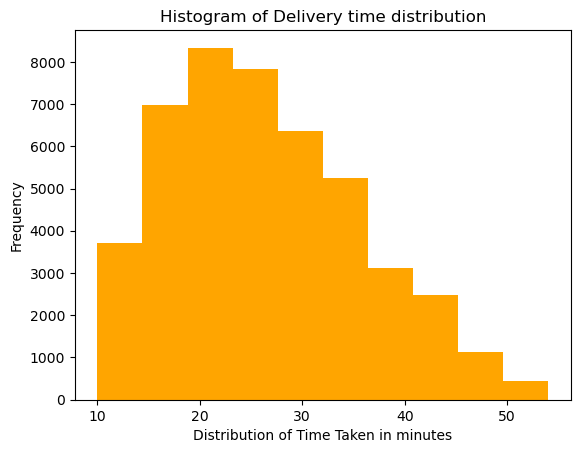

In [24]:

fig, ax= plt.subplots()

plt.hist(df_cleant['Time_taken(min)'],color = 'Orange')
plt.xlabel('Distribution of Time Taken in minutes')
plt.ylabel('Frequency')
plt.title("Histogram of Delivery time distribution")
plt.show()

The distribution rises fast, peaks between 20 and 30 mins and then falls slowly.

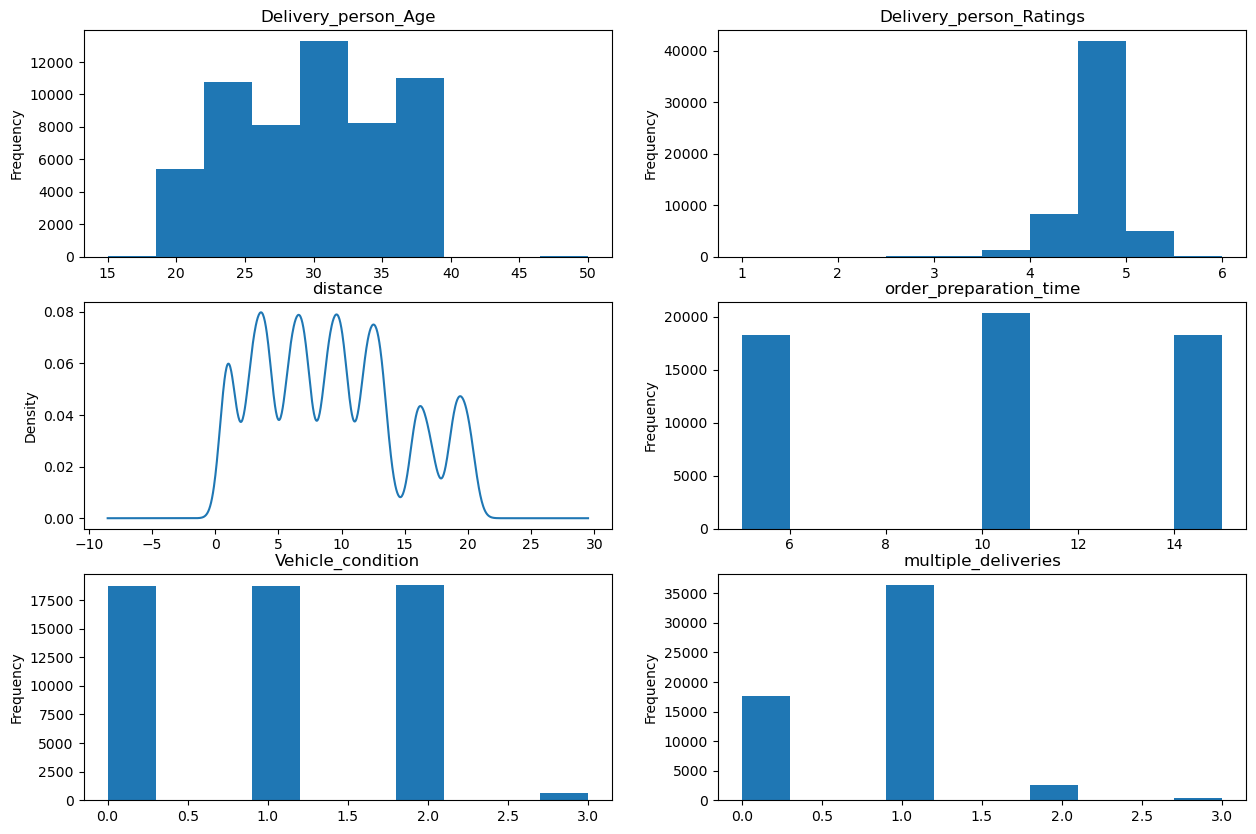

In [25]:
# visualising the numerical columns 
fig, axes = plt.subplots(3,2, figsize = (15,10))

df_cleant['Delivery_person_Age'].plot(kind = 'hist', ax = axes[0,0], title = 'Delivery_person_Age')
df_cleant['Delivery_person_Ratings'].plot(kind = 'hist', ax = axes[0,1], title = 'Delivery_person_Ratings')
df_cleant['distance'].plot(kind = 'kde', ax = axes[1,0] , title = 'distance')
df_cleant['order_preparation_time'].plot(kind = 'hist', ax = axes[1,1], title = 'order_preparation_time')
df_cleant['Vehicle_condition'].plot(kind = 'hist', ax = axes[2,0], title = 'Vehicle_condition')
df_cleant['multiple_deliveries'].plot(kind = 'hist', ax = axes[2,1], title = 'multiple_deliveries')
fig.show()

In [26]:
df_cleant.describe(include = "O").T

,count,unique,top,freq
Weatherconditions,56992,6,Fog,10196
Road_traffic_density,56992,4,Low,20113
Type_of_order,56992,4,Snack,14348
Type_of_vehicle,56992,4,motorcycle,33044
Festival,56992,2,No,55893
City,56992,3,Metropolitian,44114
indic,56992,2,train,45593


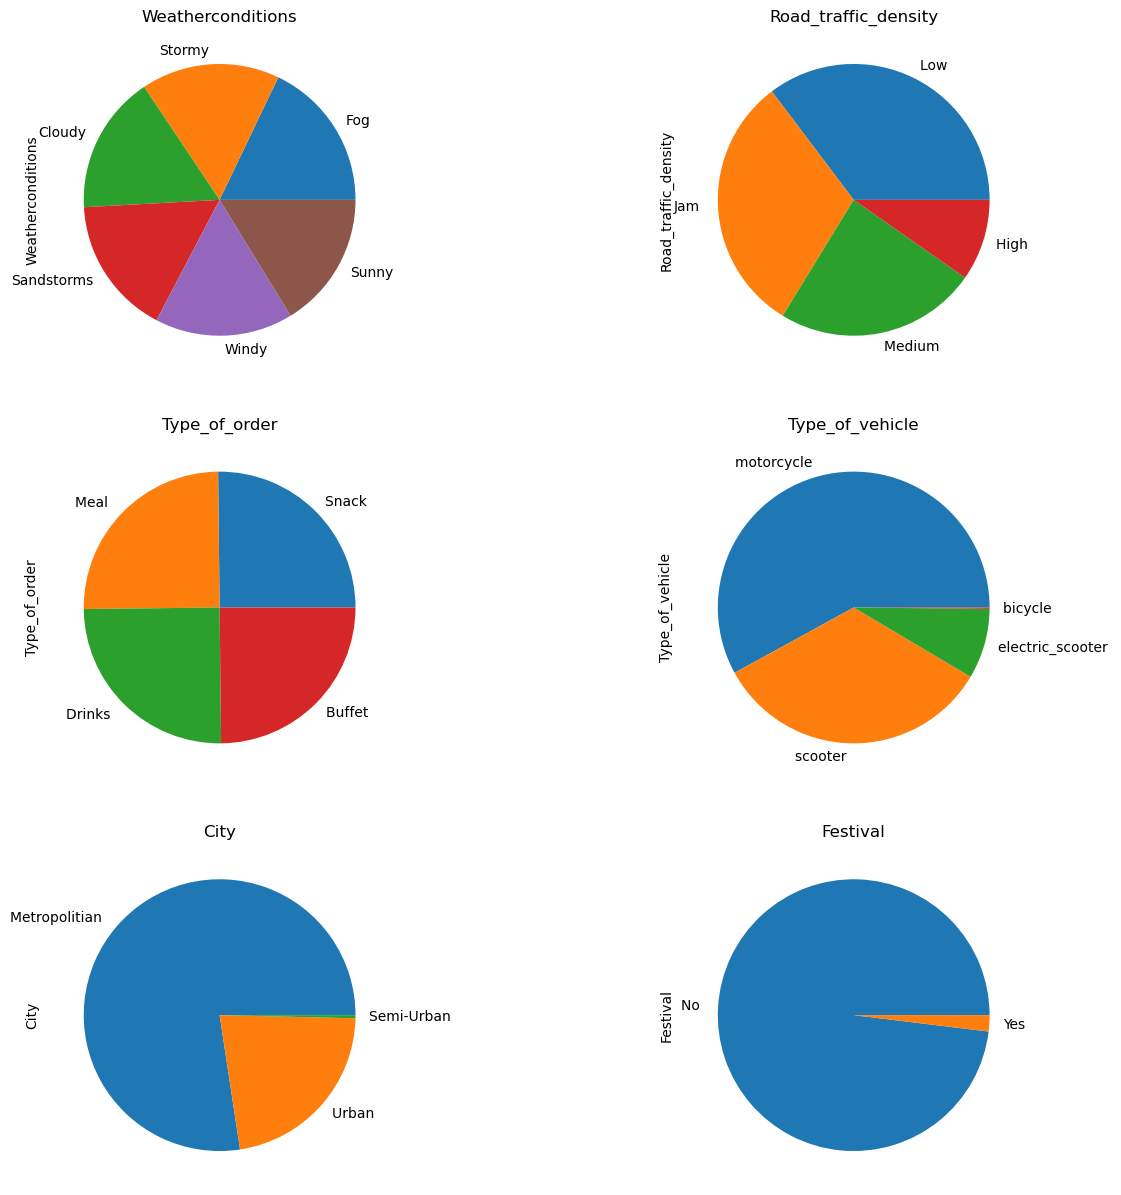

In [27]:
#univariate categorical data
fig, axes = plt.subplots(3,2, figsize = (15,15))

df_cleant['Weatherconditions'].value_counts().plot(kind = 'pie', ax = axes[0,0], title = 'Weatherconditions')
df_cleant['Road_traffic_density'].value_counts().plot(kind = 'pie', ax = axes[0,1], title = 'Road_traffic_density')
df_cleant['Type_of_order'].value_counts().plot(kind = 'pie', ax = axes[1,0], title = 'Type_of_order')
df_cleant['Type_of_vehicle'].value_counts().plot(kind = 'pie', ax = axes[1,1], title = 'Type_of_vehicle')
df_cleant['Festival'].value_counts().plot(kind = 'pie', ax = axes[2,1], title = 'Festival')
df_cleant['City'].value_counts().plot(kind = 'pie', ax = axes[2,0], title = 'City')


fig.show()

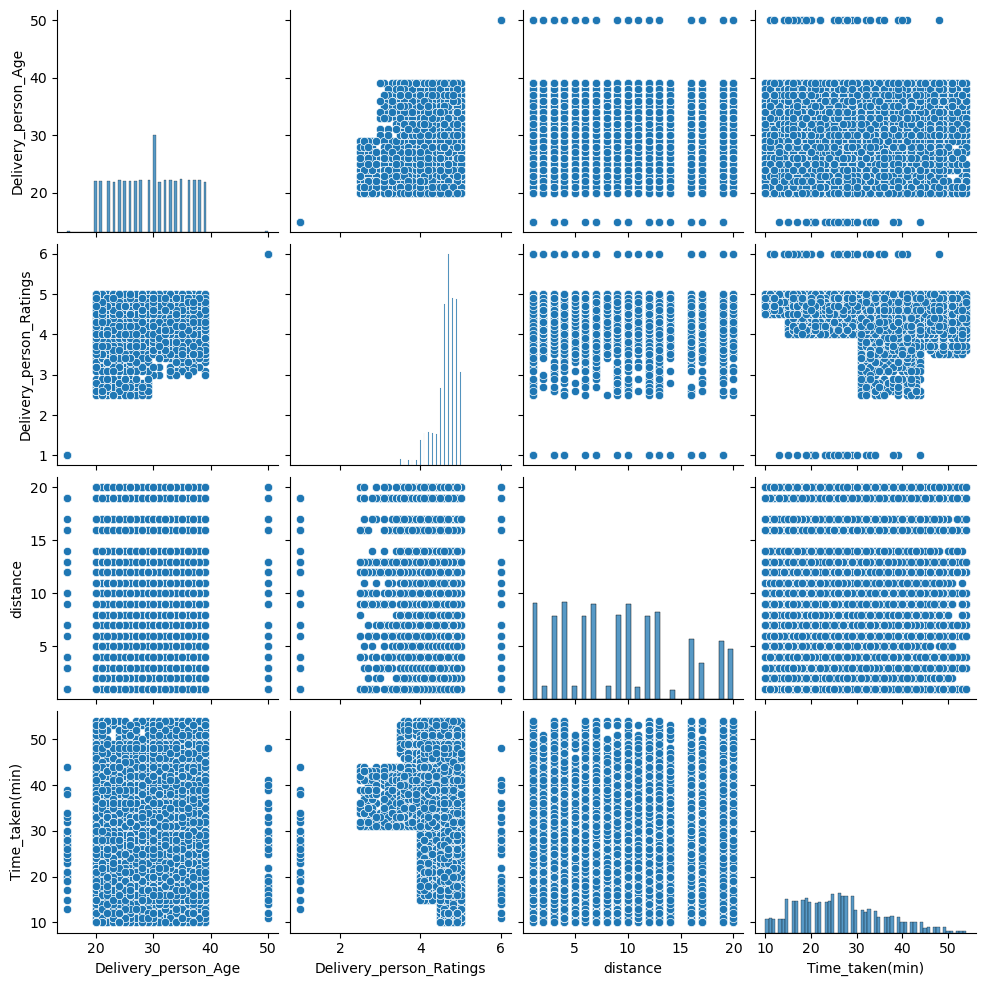

In [28]:
#relationship between timetaken and Continuous data
cols = ['Delivery_person_Age','Delivery_person_Ratings','distance','Time_taken(min)']
sns.pairplot(df_cleant[cols])

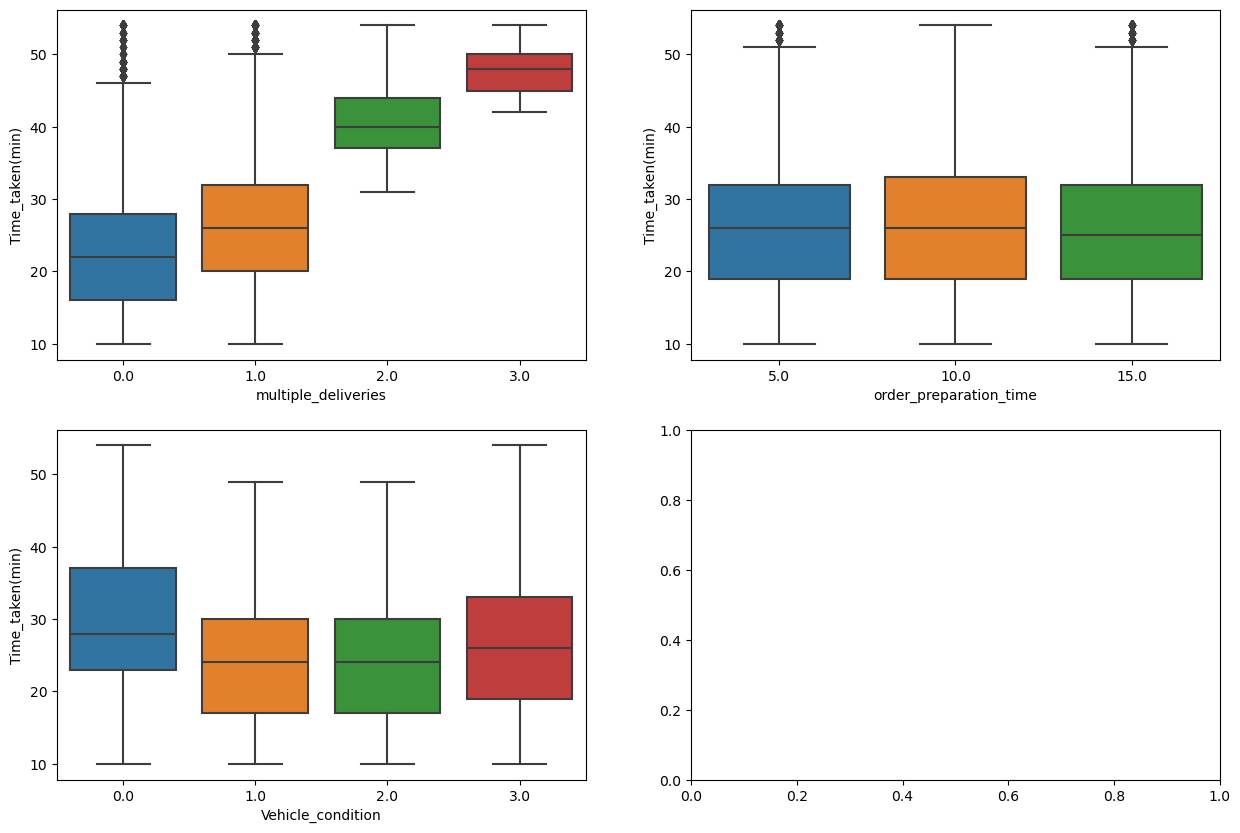

In [29]:
#relationship between time taken and discrete variables
fig,axes = plt.subplots(2,2, figsize=(15,10))

sns.boxplot(data=df_cleant,x ='multiple_deliveries',y='Time_taken(min)', ax=axes[0,0])
sns.boxplot(data=df_cleant,x ='Vehicle_condition',y='Time_taken(min)', ax=axes[1,0])
sns.boxplot(data=df_cleant,x ='order_preparation_time',y='Time_taken(min)', ax=axes[0,1])

fig.show()

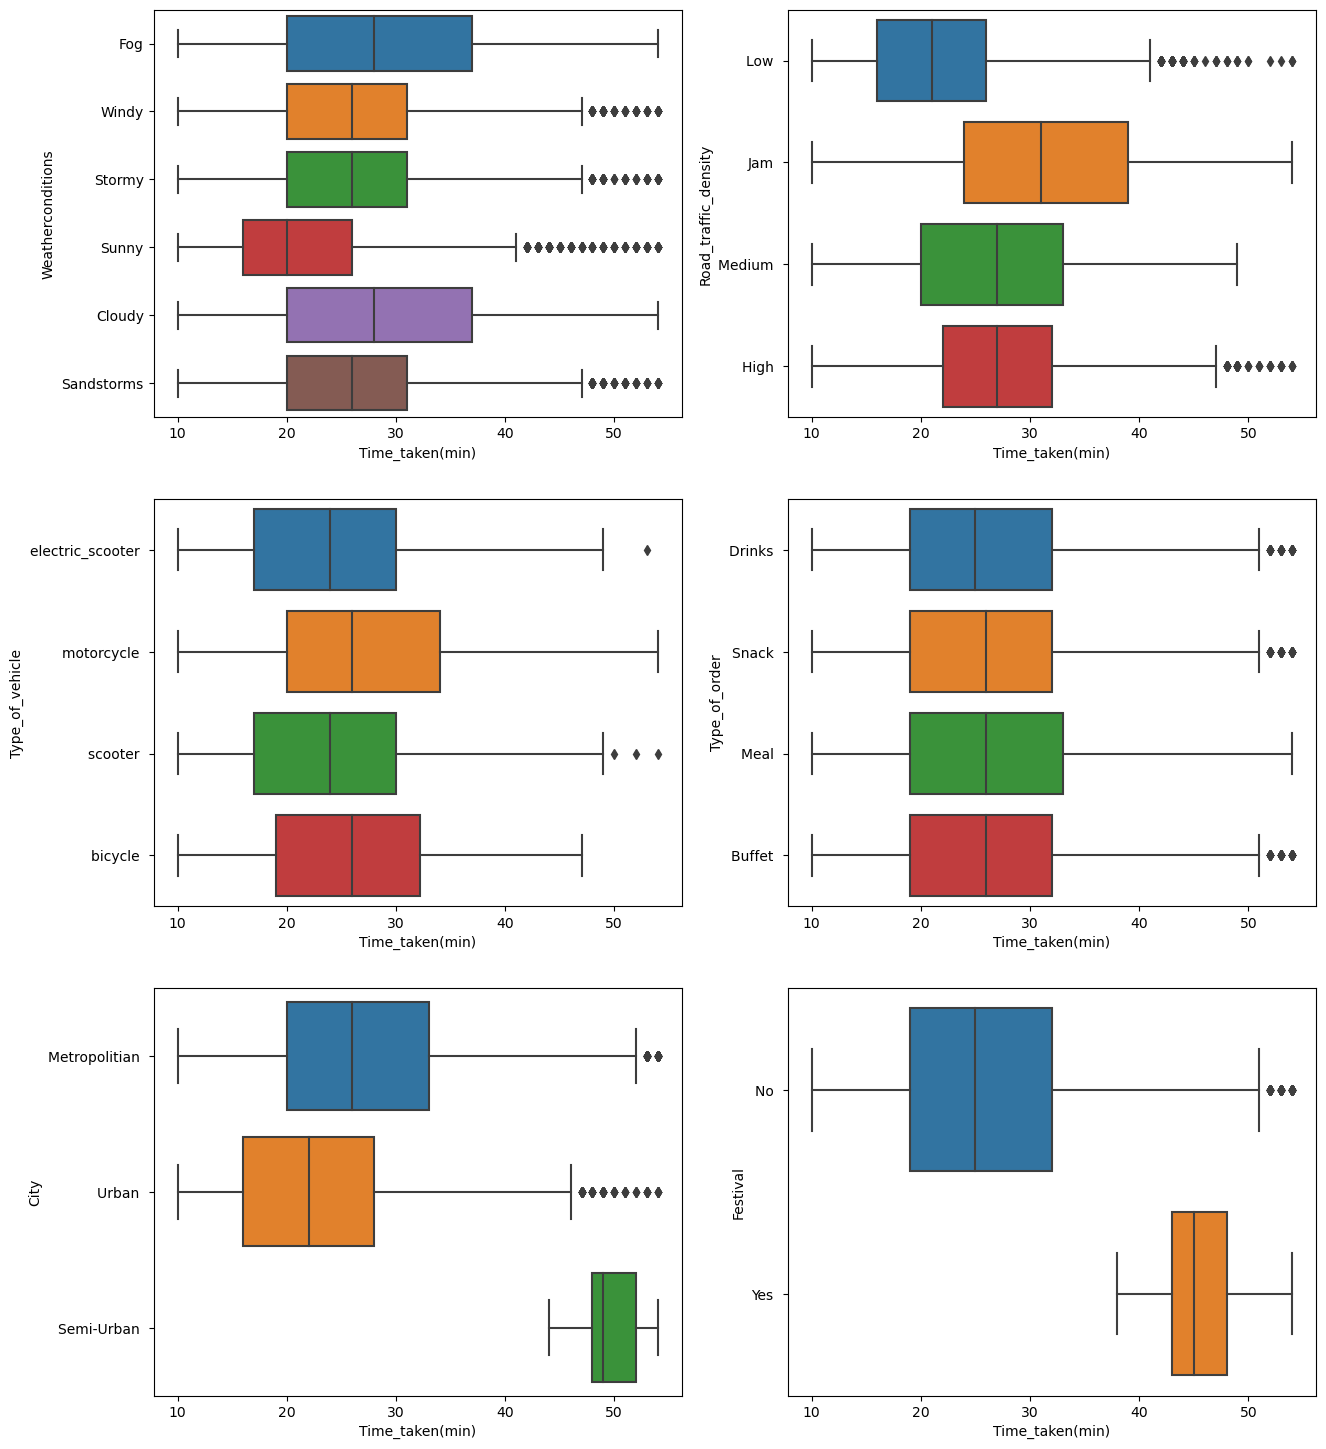

In [30]:
# relationship between time taken and categorical variables
fig,axes = plt.subplots(3,2, figsize=(15,18))

sns.boxplot(data=df_cleant,y = 'Weatherconditions', x ='Time_taken(min)', ax=axes[0,0])
sns.boxplot(data=df_cleant,y ='Road_traffic_density',x='Time_taken(min)', ax=axes[0,1])
sns.boxplot(data=df_cleant,y= 'Type_of_order',x = 'Time_taken(min)',ax=axes[1,1])
sns.boxplot(data=df_cleant,y = 'Type_of_vehicle',x = 'Time_taken(min)',ax=axes[1,0])
sns.boxplot(data=df_cleant,y= 'Festival',x = 'Time_taken(min)',ax=axes[2,1])
sns.boxplot(data=df_cleant,y = 'City',x = 'Time_taken(min)',ax=axes[2,0])
plt.show()

<AxesSubplot:>

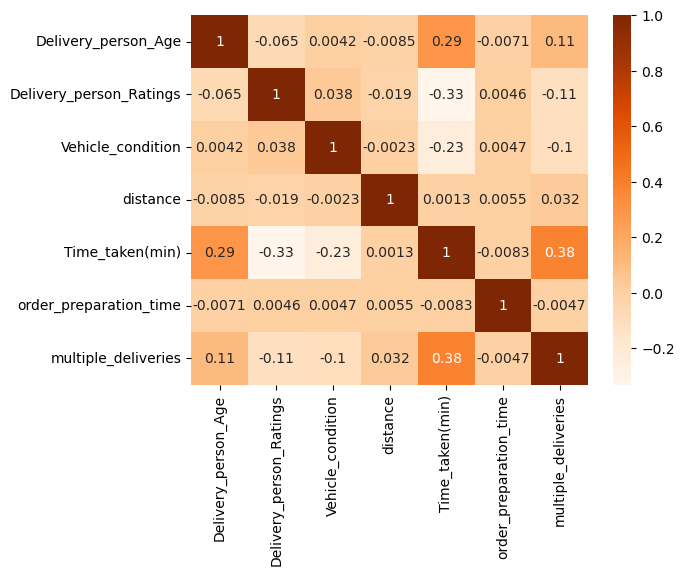

In [31]:
sns.heatmap(df_cleant.corr(), cmap='Oranges', annot = True)

Looking at the variables there doesn't seem to be much variation in delivery time based on the continuous variables. From the above graphs we can see that features that affect delivery time are:

* 1- Multiple Deliveries
* 2- Weather Condition
* 3- Road Traffic
* 4- City 
* 5- Festival
* 6- Type of Vehicle

Features such as Vehicle condition and Order Preparation Time have the same mean but different distributions.

The data does not show any strong linear correlation with the target variable.

# Converting to Binary

In [32]:
#converting to binary using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown = 'ignore', drop = 'first',sparse = False)

to_binary_cols = df_cleant[['Weatherconditions','Road_traffic_density', 'Type_of_order',
              'Type_of_vehicle','Festival','City']]

df_binary = pd.DataFrame(OH_encoder.fit_transform(to_binary_cols), 
                         columns = ['Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy', 'Jam ', 
                                    'Low ', 'Medium ','Drinks ', 'Meal ', 'Snack ','electric_scooter ', 
                                    'motorcycle ', 'scooter ','festival','Semi-Urban ', 'Urban '])
OH_encoder.categories_

[array(['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy'],
       dtype=object),
 array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object),
 array(['Buffet ', 'Drinks ', 'Meal ', 'Snack '], dtype=object),
 array(['bicycle ', 'electric_scooter ', 'motorcycle ', 'scooter '],
       dtype=object),
 array(['No ', 'Yes '], dtype=object),
 array(['Metropolitian ', 'Semi-Urban ', 'Urban '], dtype=object)]

In [33]:
df_binary.head()

,Fog,Sandstorms,Stormy,Sunny,Windy,Jam,Low,Medium,Drinks,Meal,Snack,electric_scooter,motorcycle,scooter,festival,Semi-Urban,Urban
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
#the numerical features
df_num = df_cleant[['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition',
                   'distance','Time_taken(min)','order_preparation_time','indic','multiple_deliveries']]


In [35]:
df_transformed = pd.concat([df_num,df_binary], axis = 1)
df_transformed.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,distance,Time_taken(min),order_preparation_time,indic,multiple_deliveries,Fog,Sandstorms,...,Medium,Drinks,Meal,Snack,electric_scooter,motorcycle,scooter,festival,Semi-Urban,Urban
0,30.0,4.7,3.0,6.0,NaN,10.0,test,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,28.0,4.6,0.0,17.0,NaN,5.0,test,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,23.0,4.5,0.0,13.0,NaN,10.0,test,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,21.0,4.8,1.0,13.0,NaN,5.0,test,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,31.0,4.6,2.0,17.0,NaN,15.0,test,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Spliting the Data back

In [36]:
 test, train = df_transformed[df_transformed["indic"].eq("test")], df_transformed[df_transformed["indic"].eq("train")]

In [37]:
train = pd.DataFrame(df_transformed[df_transformed["indic"].eq("train")])
test = pd.DataFrame(df_transformed[df_transformed["indic"].eq("test")])

In [38]:
train.drop(['indic'], axis = 1, inplace = True)
test.drop(['indic','Time_taken(min)'], axis = 1, inplace = True)


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45593 entries, 11399 to 56991
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  float64
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Vehicle_condition        45593 non-null  float64
 3   distance                 45593 non-null  float64
 4   Time_taken(min)          45593 non-null  float64
 5   order_preparation_time   45593 non-null  float64
 6   multiple_deliveries      45593 non-null  float64
 7   Fog                      45593 non-null  float64
 8   Sandstorms               45593 non-null  float64
 9   Stormy                   45593 non-null  float64
 10  Sunny                    45593 non-null  float64
 11  Windy                    45593 non-null  float64
 12  Jam                      45593 non-null  float64
 13  Low                      45593 non-null  float64
 14  Medium            

# Separating Train data into Features and Target Variable
Only the train data is important for building the models. 

In [40]:
X = train.drop(['Time_taken(min)'], axis = 1)
y = train['Time_taken(min)']

In [41]:
X.shape , y.shape

((45593, 23), (45593,))

## Spliting into training data into X_train, X_test, y_train, y_test

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 16)

# Feature Selection 

Using all 25 features can lead to overfitting of the data and the predictions will be off. It can also be computationally very heavy. Hence, feature selection is an important task.I will use three method for feature selection:
* 1- Random Forest Importance


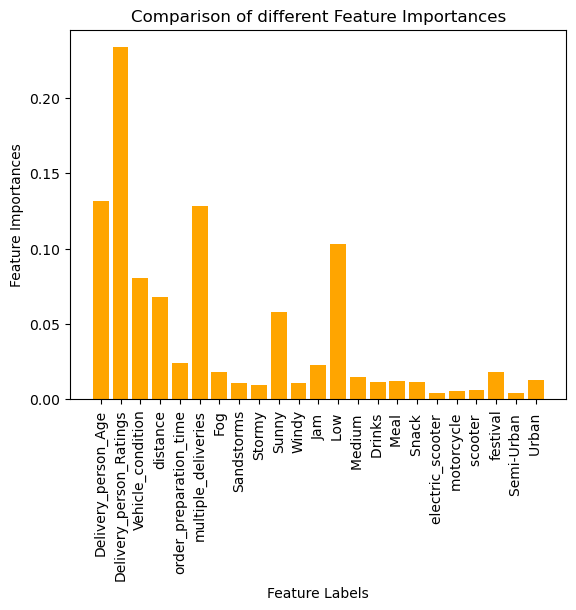

In [43]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor( criterion = 'squared_error', random_state = 7)
rf.fit(X_train, y_train)

feature_importance = rf.feature_importances_
plt.bar(X.columns, feature_importance, color = 'orange')
plt.xticks(rotation = 'vertical')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

Based on the above, we can select 8 common features:
1.  Delivery person ratings
1.  multiple deliveries
1.  Low
1.  vehicle condition
1.  Festival
1.  Delivery person age
1.  Sunny
1.  Urban




In [44]:
X_train.drop([ 'Fog', 'Sandstorms', 'Stormy','Windy', 'Jam ', 
            'Medium ','Drinks ', 'Meal ', 'Snack ','electric_scooter ', 'motorcycle ', 
            'scooter ','Semi-Urban ','distance','order_preparation_time','Delivery_person_Age'], 
             axis = 1, inplace = True)
X_train.shape , y_train.shape

((27355, 7), (27355,))

In [45]:
X_test.drop([ 'Fog', 'Sandstorms', 'Stormy','Windy', 'Jam ', 
            'Medium ','Drinks ', 'Meal ', 'Snack ','electric_scooter ', 'motorcycle ', 
            'scooter ','Semi-Urban ','distance','order_preparation_time','Delivery_person_Age'], 
             axis = 1, inplace = True)
X_test.shape , y_test.shape

((18238, 7), (18238,))

# Building Models


1. Multiple Linear Regression
1. Decision Trees
1. Random Forests

1. K Nearest Neighbours






In [46]:
test_mse = []
train_mse = []

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
train_mse.append(mean_squared_error(y_train, reg.predict(X_train)))
test_mse.append(mean_squared_error(y_test, reg.predict(X_test)))

In [48]:
#Regression coefficients
print("Intercept", reg.intercept_ )

for i in zip(X_train.columns, reg.coef_):
    print(i)
    
print("R-squared", reg.score(X_train,y_train))    

Intercept 64.01057072511747
('Delivery_person_Ratings', -7.645110706546013)
('Vehicle_condition', -1.9680684148343695)
('multiple_deliveries', 3.9919673103438)
('Sunny', -4.488171638254961)
('Low ', -6.261285328489283)
('festival', 12.777088390711828)
('Urban ', -2.572024058448088)
R-squared 0.4545926917637515


In [49]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion = 'squared_error',random_state = 1)
dtree.fit(X_train,y_train)
print("Tree Depth",dtree.get_depth())
print("Terminal Nodes", dtree.get_n_leaves())
train_mse.append(mean_squared_error(y_train, dtree.predict(X_train)))
test_mse.append(mean_squared_error(y_test, dtree.predict(X_test)))

Tree Depth 17
Terminal Nodes 977


In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2,4,6,8,10,12,16,20],
    'max_leaf_nodes': [6,10,15,20,30,50,70]
    }
    
    
dtree_grid_search = GridSearchCV(dtree, param_grid=param_grid,
                              cv = 5, scoring = 'neg_mean_squared_error',
                              return_train_score = True )
dtree_grid_search.fit(X_train, y_train)
dtree_grid_search.best_params_
print(dtree_grid_search.best_estimator_)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=70, random_state=1)


In [51]:
#Decision Trees after pruning
dtree_pruned = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=70,
                                     criterion = 'squared_error',random_state = 1)
dtree_pruned.fit(X_train,y_train)
#print(dtree.get_depth())
#print(dtree.get_n_leaves())
train_mse.append(mean_squared_error(y_train, dtree_pruned.predict(X_train)))
test_mse.append(mean_squared_error(y_test, dtree_pruned.predict(X_test)))

Since the tree is too large it is difficult to plot it.

In [52]:
#RandomForest
rf_reg = RandomForestRegressor(criterion = 'squared_error', random_state = 5)
rf_reg.fit(X_train,y_train)
print(rf_reg.get_params(deep=True))
train_mse.append(mean_squared_error(y_train, rf_reg.predict(X_train)))
test_mse.append(mean_squared_error(y_test, rf_reg.predict(X_test)))


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 5, 'verbose': 0, 'warm_start': False}


In [53]:

param_grid = {
    'max_depth': [2,4,6,8,10,12],
    'max_features': ['sqrt', 'log2', None],
}

rf_grid_search = GridSearchCV(rf_reg, param_grid=param_grid,
                              cv = 5, scoring = 'neg_mean_squared_error',
                              return_train_score = True )
rf_grid_search.fit(X_train, y_train)
rf_grid_search.best_params_

{'max_depth': 8, 'max_features': None}

In [54]:
#RandomForest with hypertuned parameters
rf_cv = RandomForestRegressor(max_depth = 8, max_features = None, random_state = 5)
rf_cv.fit(X_train, y_train)
train_mse.append(mean_squared_error(y_train, rf_cv.predict(X_train)))
test_mse.append(mean_squared_error(y_test, rf_cv.predict(X_test)))

In [55]:
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor 

knn = KNeighborsRegressor()

param_grid = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10] 
}

knn_grid_search = GridSearchCV(knn, param_grid=param_grid,
                              cv = 5, scoring = 'neg_mean_squared_error',
                              return_train_score = True )
knn_grid_search.fit(X_train, y_train)
knn_grid_search.best_params_
print(knn_grid_search.best_estimator_)

KNeighborsRegressor(n_neighbors=10)


In [56]:
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train,y_train)
train_mse.append(mean_squared_error(y_train, knn_reg.predict(X_train)))
test_mse.append(mean_squared_error(y_test, knn_reg.predict(X_test)))

# Comparing model MSE

Text(0.5, 1.0, 'Mean squared error by model')

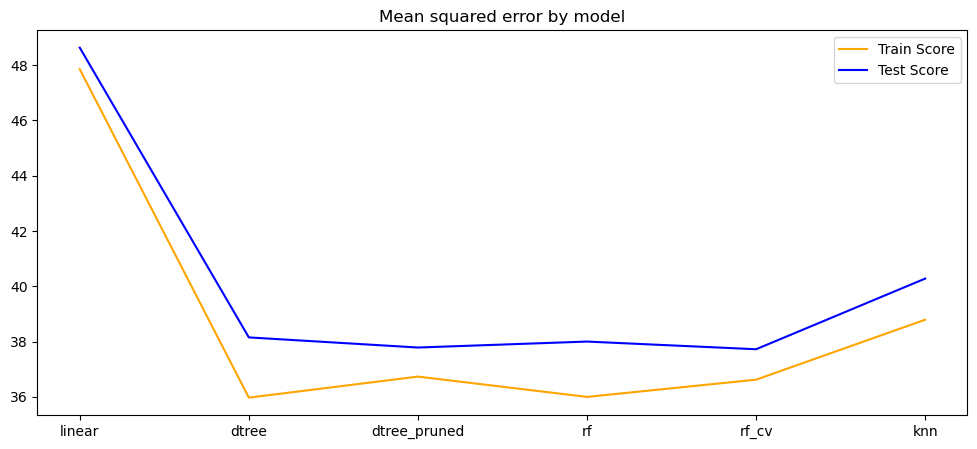

In [57]:
plt.figure(figsize=(12,5))
sns.lineplot(['linear','dtree','dtree_pruned','rf','rf_cv','knn'],train_mse,label='Train Score', color = 'Orange')
sns.lineplot(['linear','dtree','dtree_pruned','rf','rf_cv','knn'],test_mse,label='Test Score', color = 'Blue')
plt.title("Mean squared error by model")

The hypertunning of parameters affected the training MSE but did not lower the test MSE. Overall Decision trees and Random Forest performed the best.

In [58]:
list = ['linear','dtree','dtree_pruned','rf','rf_cv','knn']
for i in zip(list, train_mse, test_mse):
    print(i)

('linear', 47.854940352301206, 48.63402502831465)
('dtree', 35.96973087885055, 38.14948767174179)
('dtree_pruned', 36.731328775753326, 37.78285185898964)
('rf', 35.99606566040298, 37.99846957997676)
('rf_cv', 36.619893633194785, 37.72093478053871)
('knn', 38.7893375982453, 40.277680666739776)


# future observation

In [59]:
def predicttime():
    Delivery_person_Age=int(input("Enter the delivery Persons Age:-  "))
    Delivery_person_Ratings=float(input("Enter the delivery perons Rating:-  "))
    Vehicle_condition=int(input("Enter Vehicle Conditions:-  "))
    multiple_deliveries=int(input("Were there multiple deliveries if yes 1 if no 0:-   "))
    distance=int(input("Enter the distance in KM:- "))
    festival=int(input("Enter if there was any festival 1 if yes 0 if no:--- "))
    Sunny=int(input("Enter weather was sunny 1 if yes 0 if no:---"))                   
    newob=[[Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition, multiple_deliveries,distance,festival,Sunny]]
    
    y=rf_reg.predict(newob)[0]
    return y

In [60]:

predicttime()

Enter the delivery Persons Age:-  30
Enter the delivery perons Rating:-  4
Enter Vehicle Conditions:-  3
Were there multiple deliveries if yes 1 if no 0:-   1
Enter the distance in KM:- 8
Enter if there was any festival 1 if yes 0 if no:--- 1
Enter weather was sunny 1 if yes 0 if no:---0


49.05239682539683